<a href="https://colab.research.google.com/github/fridaruh/RiskMathics_Credito_y_Fraude/blob/master/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

**📂 Transaction Data**

transaction_records.csv: Contains transaction records with details such as transaction ID, date, amount, and customer ID.

transaction_metadata.csv: Contains additional metadata for each transaction.

**📂 Customer Profiles**

customer_data.csv: Includes customer profiles with information such as name, age, address, and contact details.

account_activity.csv: Provides details of customer account activity, including account balance, transaction history, and account status.

**📂 Fraudulent Patterns**

fraud_indicators.csv: Contains indicators of fraudulent patterns and suspicious activities.

suspicious_activity.csv: Provides specific details of transactions flagged as suspicious.

**📂 Transaction Amounts**

amount_data.csv: Includes transaction amounts for each transaction.

anomaly_scores.csv: Provides anomaly scores for transaction amounts, indicating potential fraudulence.

**📂 Merchant Information**

merchant_data.csv: Contains information about merchants involved in transactions.

transaction_category_labels.csv: Provides category labels for different transaction types.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wr
wr.filterwarnings(action="ignore")
import seaborn as sns

In [54]:
account = pd.read_csv("account_activity.csv")
customer = pd.read_csv("customer_data.csv")
fraud = pd.read_csv("fraud_indicators.csv")
suspision = pd.read_csv("suspicious_activity.csv")
merchant = pd.read_csv("merchant_data.csv")
tran_cat = pd.read_csv("transaction_category_labels.csv")
amount = pd.read_csv("amount_data.csv")
anamoly = pd.read_csv("anomaly_scores.csv")
tran_data = pd.read_csv("transaction_metadata.csv")
tran_rec = pd.read_csv("transaction_records.csv")

In [55]:
data = [account,customer,fraud,suspision,merchant,tran_cat,amount,anamoly,tran_data,tran_rec]

In [56]:
for df in data:
    print(df.head())

   CustomerID  AccountBalance   LastLogin
0        1001     9507.272060  2022-01-01
1        1002     7408.704536  2022-01-02
2        1003     1715.321989  2022-01-03
3        1004     3101.509134  2022-01-04
4        1005     5405.766914  2022-01-05
   CustomerID           Name  Age       Address
0        1001  Customer 1001   54  Address 1001
1        1002  Customer 1002   35  Address 1002
2        1003  Customer 1003   40  Address 1003
3        1004  Customer 1004   30  Address 1004
4        1005  Customer 1005   46  Address 1005
   TransactionID  FraudIndicator
0              1               0
1              2               0
2              3               0
3              4               0
4              5               0
   CustomerID  SuspiciousFlag
0        1001               0
1        1002               0
2        1003               0
3        1004               0
4        1005               0
   MerchantID   MerchantName       Location
0        2001  Merchant 2001  Location

In [57]:
costumer_data = pd.merge(customer, account, on='CustomerID')
costumer_data = pd.merge(costumer_data, suspision, on='CustomerID')
costumer_data

,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1001,Customer 1001,54,Address 1001,9507.272060,2022-01-01,0
1,1002,Customer 1002,35,Address 1002,7408.704536,2022-01-02,0
2,1003,Customer 1003,40,Address 1003,1715.321989,2022-01-03,0
3,1004,Customer 1004,30,Address 1004,3101.509134,2022-01-04,0
4,1005,Customer 1005,46,Address 1005,5405.766914,2022-01-05,0
...,...,...,...,...,...,...,...
995,1996,Customer 1996,33,Address 1996,8523.485163,2024-09-22,0
996,1997,Customer 1997,58,Address 1997,9255.451757,2024-09-23,0
997,1998,Customer 1998,25,Address 1998,9148.652759,2024-09-24,0
998,1999,Customer 1999,57,Address 1999,7376.854107,2024-09-25,0


In [58]:
transaction_data1 = pd.merge(fraud, tran_cat, on="TransactionID")
transaction_data2 = pd.merge(amount, anamoly, on="TransactionID")
transaction_data3 = pd.merge(tran_data, tran_rec, on="TransactionID")
transaction_data = pd.merge(transaction_data1, transaction_data2,on="TransactionID")
transaction_data = pd.merge(transaction_data, transaction_data3,on="TransactionID")

In [59]:
transaction_data

,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID
0,1,0,Other,79.413607,0.686699,2022-01-01 00:00:00,2701,55.530334,1952
1,2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,2070,12.881180,1027
2,3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,2238,50.176322,1955
3,4,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,2879,41.634001,1796
4,5,0,Other,54.051618,0.034059,2022-01-01 04:00:00,2966,78.122853,1946
...,...,...,...,...,...,...,...,...,...
995,996,0,Food,89.457059,0.266778,2022-02-11 11:00:00,2150,19.876750,1411
996,997,0,Retail,47.958030,0.512483,2022-02-11 12:00:00,2888,96.299792,1566
997,998,0,Food,64.210046,0.367740,2022-02-11 13:00:00,2037,75.164459,1654
998,999,0,Travel,64.684167,0.960364,2022-02-11 14:00:00,2629,93.633040,1928


In [60]:
data = pd.merge(transaction_data, costumer_data,on="CustomerID")
data

,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1,0,Other,79.413607,0.686699,2022-01-01 00:00:00,2701,55.530334,1952,Customer 1952,50,Address 1952,2869.689912,2024-08-09,0
1,2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,2070,12.881180,1027,Customer 1027,46,Address 1027,9527.947107,2022-01-27,0
2,3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,2238,50.176322,1955,Customer 1955,34,Address 1955,9288.355525,2024-08-12,0
3,4,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,2879,41.634001,1796,Customer 1796,33,Address 1796,5588.049942,2024-03-06,0
4,5,0,Other,54.051618,0.034059,2022-01-01 04:00:00,2966,78.122853,1946,Customer 1946,18,Address 1946,7324.785332,2024-08-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,Food,89.457059,0.266778,2022-02-11 11:00:00,2150,19.876750,1411,Customer 1411,19,Address 1411,1290.323059,2023-02-15,0
996,997,0,Retail,47.958030,0.512483,2022-02-11 12:00:00,2888,96.299792,1566,Customer 1566,39,Address 1566,7067.831609,2023-07-20,0
997,998,0,Food,64.210046,0.367740,2022-02-11 13:00:00,2037,75.164459,1654,Customer 1654,51,Address 1654,9088.738359,2023-10-16,0
998,999,0,Travel,64.684167,0.960364,2022-02-11 14:00:00,2629,93.633040,1928,Customer 1928,60,Address 1928,9352.655675,2024-07-16,0


# Data Exploration

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      1000 non-null   int64  
 1   FraudIndicator     1000 non-null   int64  
 2   Category           1000 non-null   object 
 3   TransactionAmount  1000 non-null   float64
 4   AnomalyScore       1000 non-null   float64
 5   Timestamp          1000 non-null   object 
 6   MerchantID         1000 non-null   int64  
 7   Amount             1000 non-null   float64
 8   CustomerID         1000 non-null   int64  
 9   Name               1000 non-null   object 
 10  Age                1000 non-null   int64  
 11  Address            1000 non-null   object 
 12  AccountBalance     1000 non-null   float64
 13  LastLogin          1000 non-null   object 
 14  SuspiciousFlag     1000 non-null   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 117.3+ KB


In [62]:
data.describe()

,TransactionID,FraudIndicator,TransactionAmount,AnomalyScore,MerchantID,Amount,CustomerID,Age,AccountBalance,SuspiciousFlag
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.045000,55.853826,0.492282,2504.701000,55.394871,1496.626000,39.848000,5715.455931,0.025000
std,288.819436,0.207408,26.093606,0.288423,288.414883,25.070809,289.229047,13.074932,2540.517262,0.156203
min,1.000000,0.000000,10.057864,0.000234,2001.000000,10.006933,1001.000000,18.000000,1056.301181,0.000000
25%,250.750000,0.000000,33.875129,0.251802,2254.500000,34.502315,1239.000000,29.000000,3489.554711,0.000000
50%,500.500000,0.000000,55.958313,0.490242,2500.500000,57.844325,1501.000000,39.000000,5753.007775,0.000000
75%,750.250000,0.000000,77.589391,0.741888,2761.250000,75.858576,1739.250000,51.000000,7925.710167,0.000000
max,1000.000000,1.000000,99.784323,0.999047,3000.000000,99.887410,2000.000000,64.000000,9999.776239,1.000000


In [63]:
data.columns

Index(['TransactionID', 'FraudIndicator', 'Category', 'TransactionAmount',
       'AnomalyScore', 'Timestamp', 'MerchantID', 'Amount', 'CustomerID',
       'Name', 'Age', 'Address', 'AccountBalance', 'LastLogin',
       'SuspiciousFlag'],
      dtype='object')

In [64]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(numerical_features)
print(categorical_features)

['TransactionID', 'FraudIndicator', 'TransactionAmount', 'AnomalyScore', 'MerchantID', 'Amount', 'CustomerID', 'Age', 'AccountBalance', 'SuspiciousFlag']
['Category', 'Timestamp', 'Name', 'Address', 'LastLogin']


# Visualization

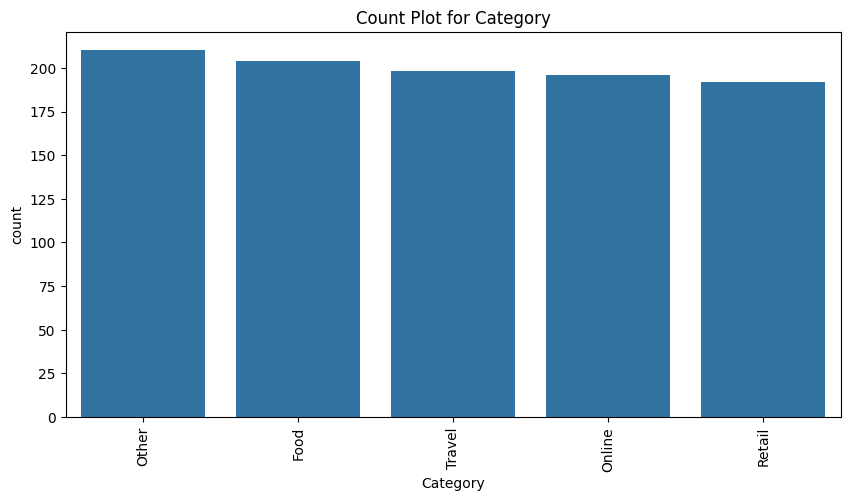

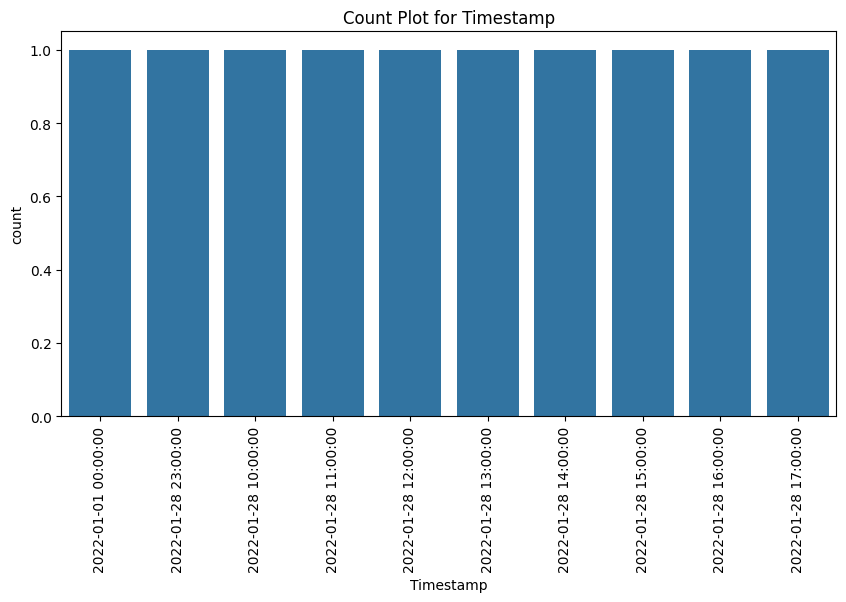

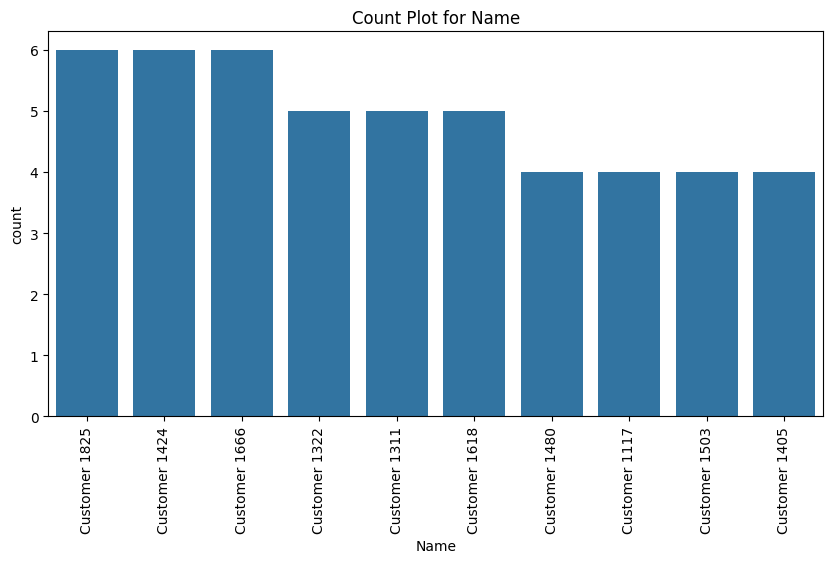

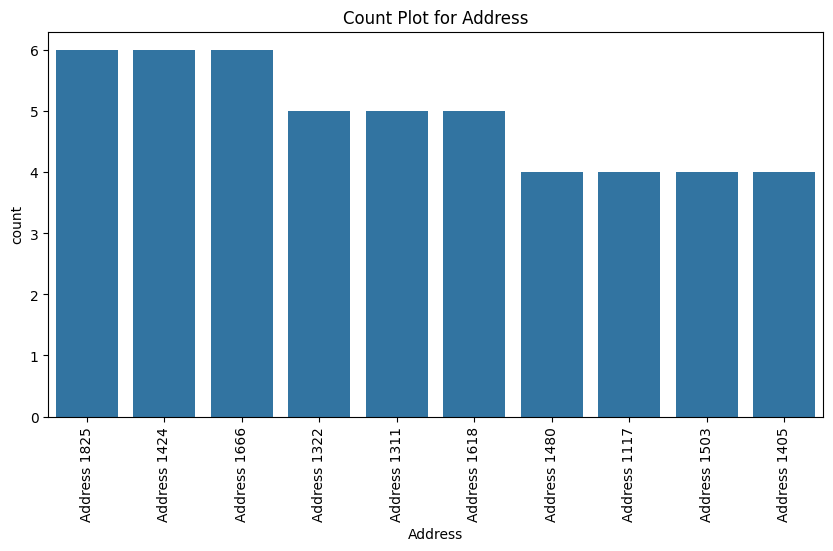

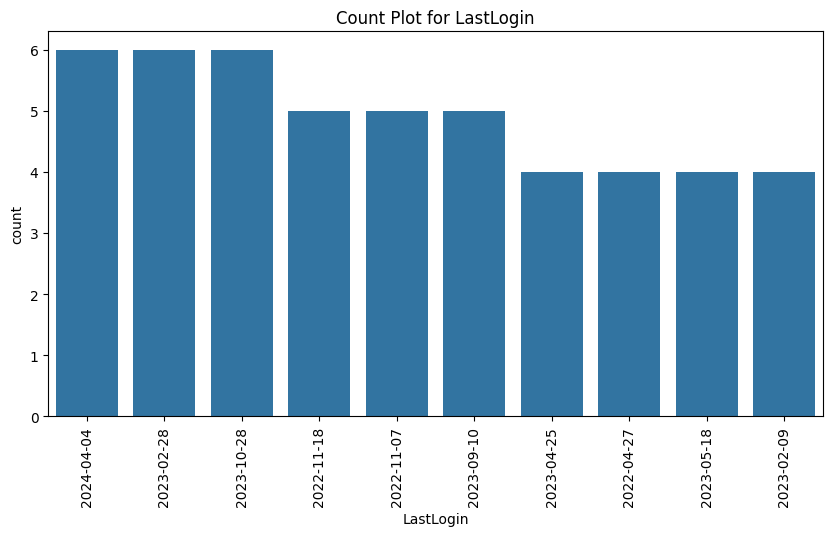

In [65]:
for column in data.columns:
    if data[column].dtype == 'object':  # Check if the column has a categorical data type
        top_10_values = data[column].value_counts().head(10)  # Get the first 10 unique values and their counts
        plt.figure(figsize=(10, 5))  # Adjust the figure size if needed
        sns.countplot(x=column, data=data, order=top_10_values.index)
        plt.title(f'Count Plot for {column}')
        plt.xticks(rotation=90)  # Rotate x-axis labels if they are long
        plt.show()

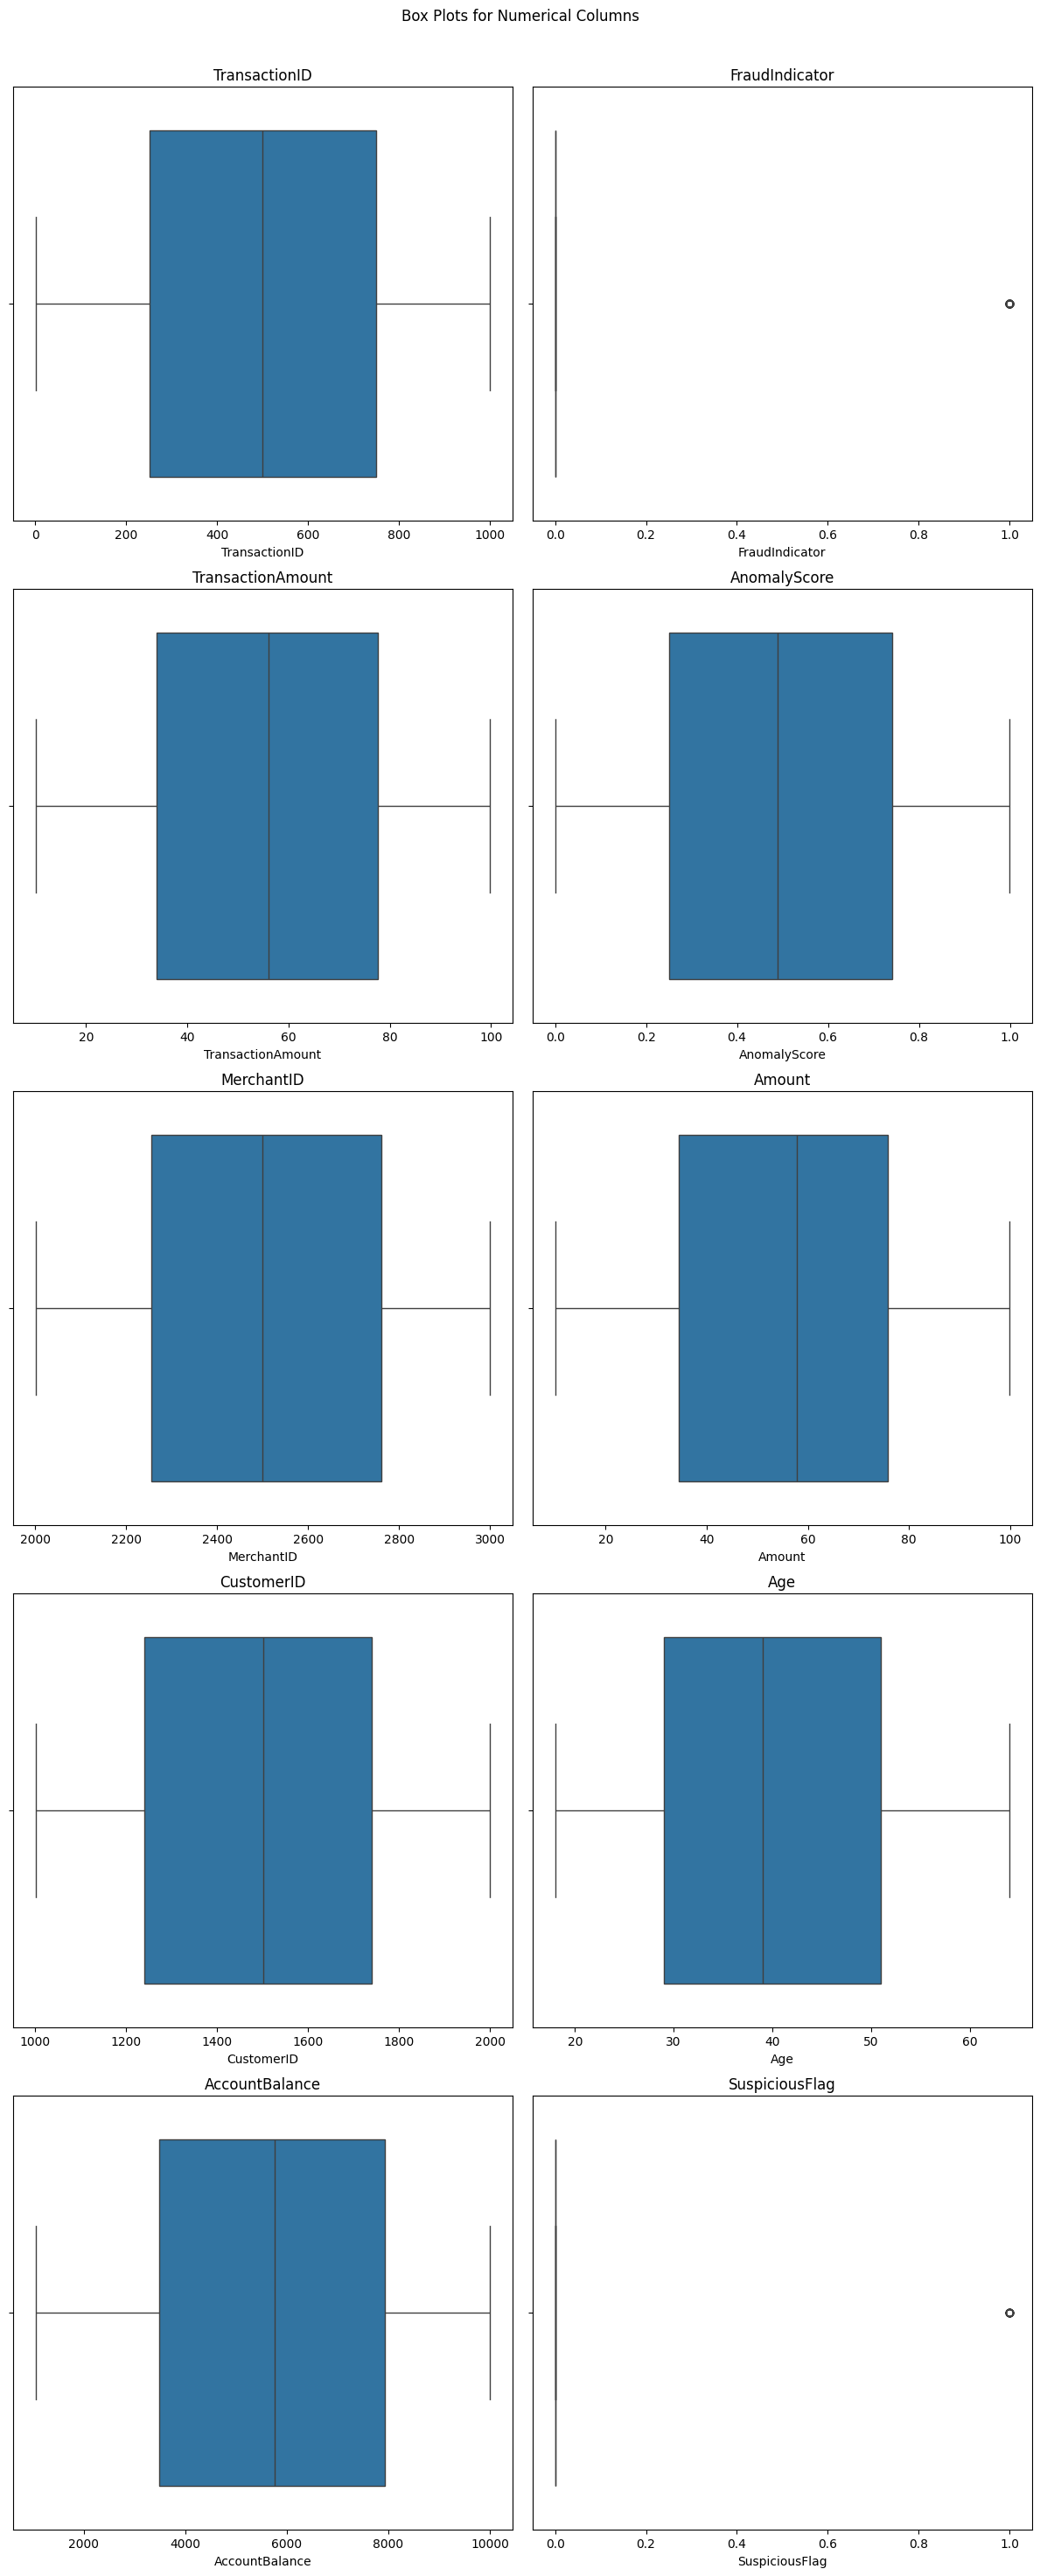

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing numerical columns

# Get the number of numerical columns
num_cols = len(data.select_dtypes(include=['number']).columns)

# Calculate the number of rows and columns for subplots
num_rows = (num_cols // 2) + (num_cols % 2)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
fig.suptitle("Box Plots for Numerical Columns")

# Loop through the numerical columns and create box plots
for i, column in enumerate(data.select_dtypes(include=['number']).columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=data[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Remove any empty subplots
if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the position of the overall title
plt.show()

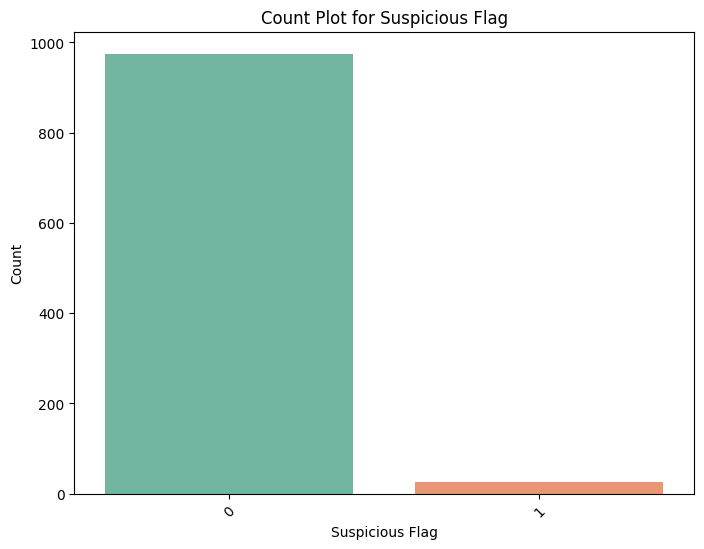

In [67]:
# We should use countplot for SuspiciousFlag feature

plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.countplot(x='SuspiciousFlag', data=data, palette='Set2')  # You can change the palette as desired
plt.title('Count Plot for Suspicious Flag')
plt.xlabel('Suspicious Flag')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if they are long

plt.show()

In [68]:
data['SuspiciousFlag'].value_counts()

,count
SuspiciousFlag,
0,975
1,25


In [69]:
data['FraudIndicator'].value_counts()

,count
FraudIndicator,
0,955
1,45


Observamos que la variable objetivo del conjunto de datos está muy desequilibrada, por lo que podemos usar técnicas adicionales para igualar los valores de las características.

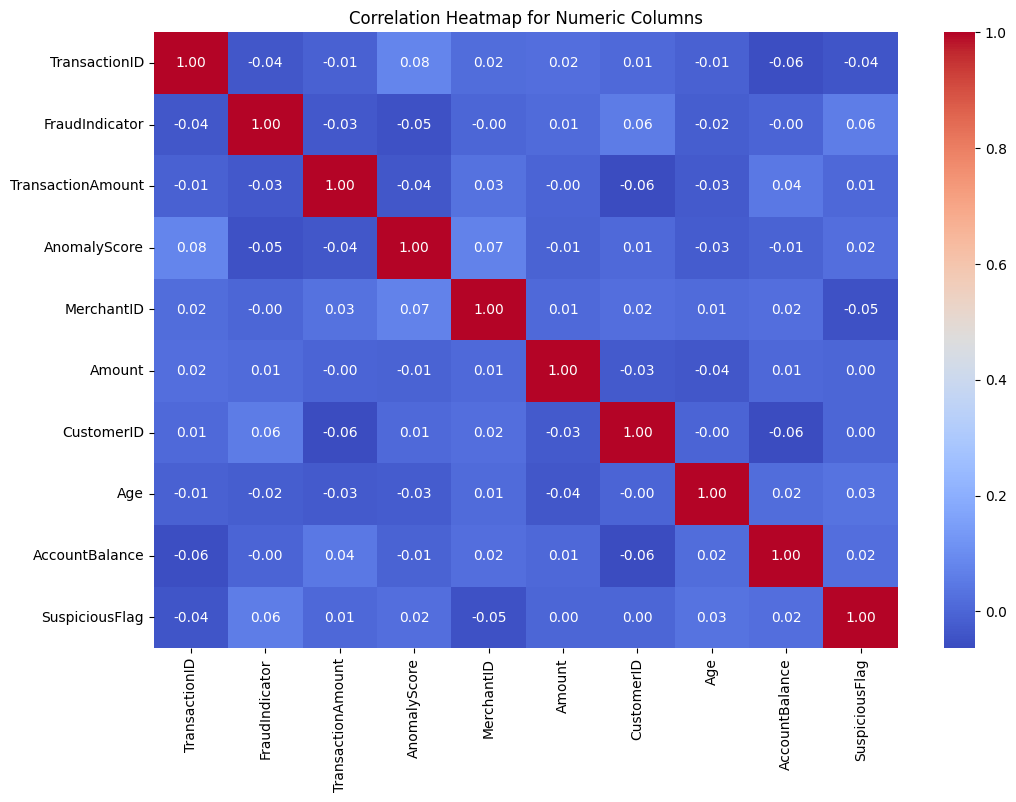

In [70]:
# Select only the numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Columns')

plt.show()

In [71]:
# Dropping the columns as of now they are not mush corelated & also wouldn't damper the performance of model

columns_to_be_dropped = ['TransactionID','MerchantID','CustomerID','Name', 'Age', 'Address']

In [72]:
data1 = data.drop(columns_to_be_dropped, axis=1)
data1.head()

,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag
0,0,Other,79.413607,0.686699,2022-01-01 00:00:00,55.530334,2869.689912,2024-08-09,0
1,0,Online,12.053087,0.081749,2022-01-01 01:00:00,12.881180,9527.947107,2022-01-27,0
2,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,50.176322,9288.355525,2024-08-12,0
3,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,41.634001,5588.049942,2024-03-06,0
4,0,Other,54.051618,0.034059,2022-01-01 04:00:00,78.122853,7324.785332,2024-08-03,0


In [73]:
data1['FraudIndicator'].value_counts(), data1['SuspiciousFlag'].value_counts(), data1['Category'].value_counts()

(FraudIndicator
 0    955
 1     45
 Name: count, dtype: int64,
 SuspiciousFlag
 0    975
 1     25
 Name: count, dtype: int64,
 Category
 Other     210
 Food      204
 Travel    198
 Online    196
 Retail    192
 Name: count, dtype: int64)

# Feature Engineering

In [74]:
# Using Feature Engineering Creating two Columns
# Hour of Transaction = hour
# Gap between the day of transaction and last login in days = gap
if pd.api.types.is_datetime64_any_dtype(data['Timestamp']):
    print("The 'Timestamp' column is already in datetime format.")
else:
    print("The 'Timestamp' column is not in datetime format.")

The 'Timestamp' column is not in datetime format.


In [75]:
#Converting TimeStamp to datetime format
data1['Timestamp1'] = pd.to_datetime(data1['Timestamp'])

print(data1.dtypes)

FraudIndicator                int64
Category                     object
TransactionAmount           float64
AnomalyScore                float64
Timestamp                    object
Amount                      float64
AccountBalance              float64
LastLogin                    object
SuspiciousFlag                int64
Timestamp1           datetime64[ns]
dtype: object


In [76]:
data1['Hour'] = data1['Timestamp1'].dt.hour

In [77]:
data1['LastLogin'] = pd.to_datetime(data1['LastLogin'])

In [78]:
data1['gap'] = (data1['Timestamp1'] - data1['LastLogin']).dt.days.abs()

In [79]:
data1.head()

,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag,Timestamp1,Hour,gap
0,0,Other,79.413607,0.686699,2022-01-01 00:00:00,55.530334,2869.689912,2024-08-09,0,2022-01-01 00:00:00,0,951
1,0,Online,12.053087,0.081749,2022-01-01 01:00:00,12.881180,9527.947107,2022-01-27,0,2022-01-01 01:00:00,1,26
2,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,50.176322,9288.355525,2024-08-12,0,2022-01-01 02:00:00,2,954
3,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,41.634001,5588.049942,2024-03-06,0,2022-01-01 03:00:00,3,795
4,0,Other,54.051618,0.034059,2022-01-01 04:00:00,78.122853,7324.785332,2024-08-03,0,2022-01-01 04:00:00,4,945


# Modelado

In [80]:
X = data1.drop(['FraudIndicator','Timestamp','Timestamp1','LastLogin'],axis=1)
Y = data1['FraudIndicator']

In [81]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Category' column
X['Category'] = label_encoder.fit_transform(X['Category'])
X

,Category,TransactionAmount,AnomalyScore,Amount,AccountBalance,SuspiciousFlag,Hour,gap
0,2,79.413607,0.686699,55.530334,2869.689912,0,0,951
1,1,12.053087,0.081749,12.881180,9527.947107,0,1,26
2,4,33.310357,0.023857,50.176322,9288.355525,0,2,954
3,4,46.121117,0.876994,41.634001,5588.049942,0,3,795
4,2,54.051618,0.034059,78.122853,7324.785332,0,4,945
...,...,...,...,...,...,...,...,...
995,0,89.457059,0.266778,19.876750,1290.323059,0,11,369
996,3,47.958030,0.512483,96.299792,7067.831609,0,12,524
997,0,64.210046,0.367740,75.164459,9088.738359,0,13,612
998,4,64.684167,0.960364,93.633040,9352.655675,0,14,886


# Train, test, split

In [152]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.5, stratify=Y)

In [153]:
X_train.shape,Y_test.shape


((500, 8), (500,))

In [154]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [166]:
# Create a logistic regression model
model = DecisionTreeClassifier(max_depth=5, random_state=99)

# Train the model on the training data
model.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=5, random_state=99)

In [156]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.942


In [157]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       477
           1       0.00      0.00      0.00        23

    accuracy                           0.94       500
   macro avg       0.48      0.49      0.49       500
weighted avg       0.91      0.94      0.93       500



In [158]:
# Make predictions on the testing data
y_pred_train = model.predict(X_train)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_train, y_pred_train)
print("Accuracy:", accuracy)

Accuracy: 0.974


In [159]:
print(classification_report(Y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       478
           1       1.00      0.41      0.58        22

    accuracy                           0.97       500
   macro avg       0.99      0.70      0.78       500
weighted avg       0.97      0.97      0.97       500



In [160]:
# Hiperparametrización con validación cruzada k-folds
max_depth_values = range(1, 11)  # Evaluar valores de max_depth de 1 a 10
kf = KFold(n_splits=5, shuffle=True, random_state=42)
avg_accuracies = []

In [161]:
for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    scores = cross_val_score(model, X_train, Y_train, cv=kf, scoring='accuracy')
    avg_accuracies.append(scores.mean())

In [162]:
avg_accuracies

[0.954,
 0.946,
 0.944,
 0.9400000000000001,
 0.9399999999999998,
 0.9339999999999999,
 0.9179999999999999,
 0.9179999999999999,
 0.9040000000000001,
 0.89]

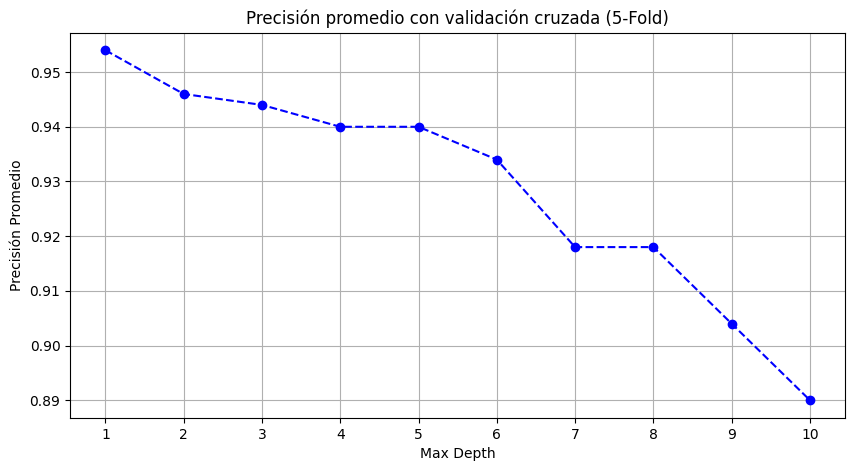

In [163]:
# Gráfica de la precisión en función de max_depth
plt.figure(figsize=(10, 5))
plt.plot(max_depth_values, avg_accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel('Max Depth')
plt.ylabel('Precisión Promedio')
plt.title('Precisión promedio con validación cruzada (5-Fold)')
plt.xticks(max_depth_values)
plt.grid()
plt.show()

In [164]:
# Seleccionar el mejor max_depth
best_max_depth = max_depth_values[np.argmax(avg_accuracies)]
print(f"Mejor max_depth: {best_max_depth} con precisión promedio de {max(avg_accuracies):.4f}")

Mejor max_depth: 1 con precisión promedio de 0.9540


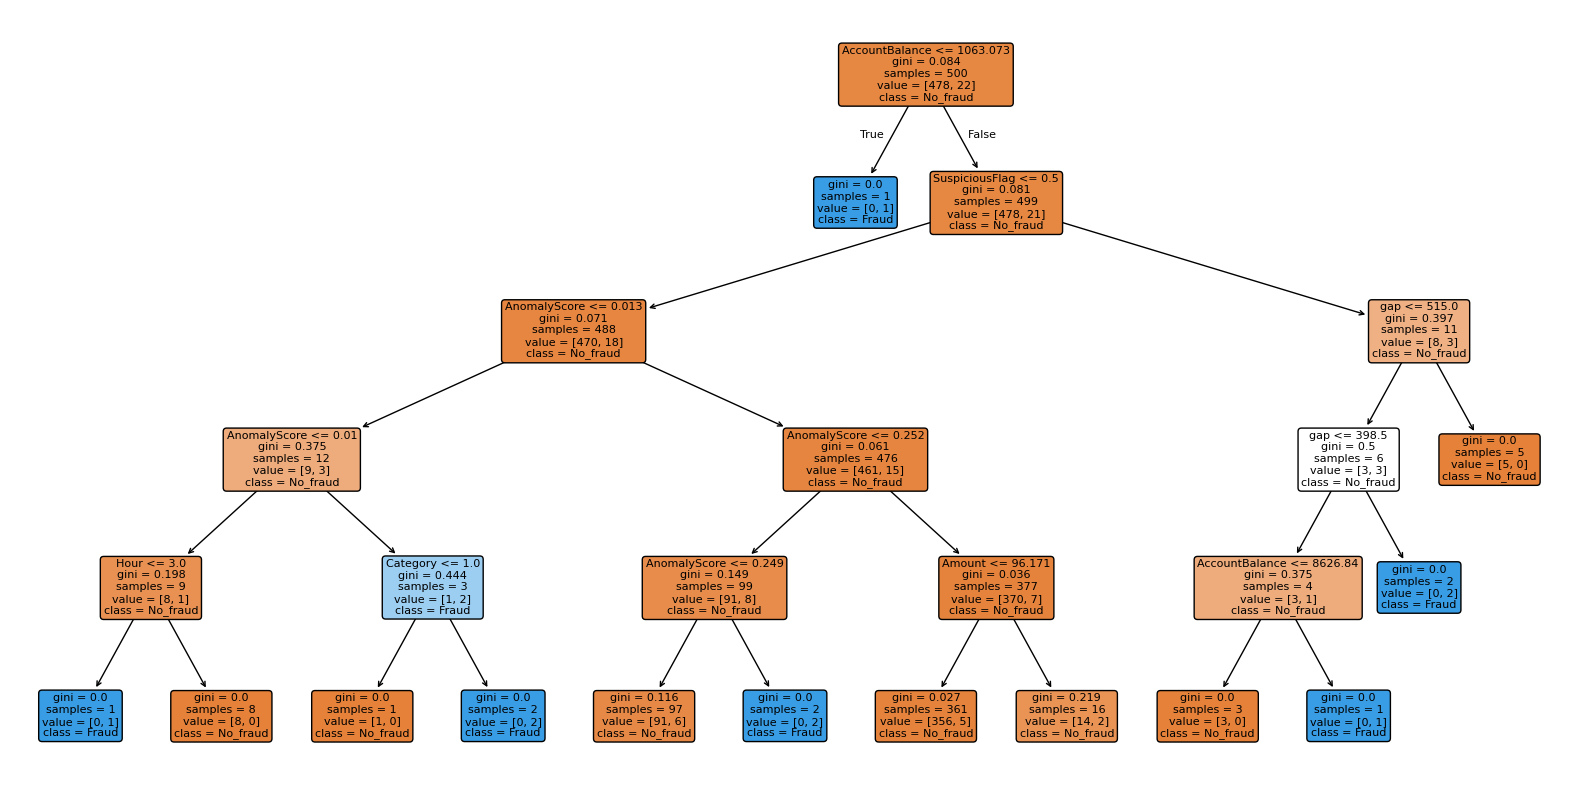

In [167]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

model.fit(X_train, Y_train)
# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=X.columns,  # Nombres de las características
          class_names=['No_fraud', 'Fraud'], # Nombres de las clases
          filled=True, rounded=True,
          fontsize=8)
plt.show()

# XGBoost

In [168]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [169]:
# Make predictions on the testing data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred_xgb)
print("Accuracy:", accuracy)

Accuracy: 0.948


In [170]:
print(classification_report(Y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       477
           1       0.00      0.00      0.00        23

    accuracy                           0.95       500
   macro avg       0.48      0.50      0.49       500
weighted avg       0.91      0.95      0.93       500



In [171]:
# Make predictions on the testing data
y_pred_train_xgb = xgb_model.predict(X_train)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_train, y_pred_train_xgb)
print("Accuracy:", accuracy)

Accuracy: 1.0


# Hiperparametrización con GridSearchCV

In [172]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200],
    'scale_pos_weight': [1, n_no_fraud / n_fraud]
}

xgb_grid = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='auc'),
                        param_grid=params, cv=3, scoring='f1', verbose=2, n_jobs=-1)

xgb_grid.fit(X_train, Y_train)
print("Mejores hiperparámetros:", xgb_grid.best_params_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Mejores hiperparámetros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 21.22222222222222}


In [181]:
# Entrenar XGBoost con los mejores hiperparámetros
xgb_best = xgb.XGBClassifier(
    learning_rate=0.01,
    max_depth=3,
    n_estimators=50,
    scale_pos_weight=21.22,
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False
)

xgb_best.fit(X_train, Y_train)

# Evaluar en conjunto de prueba
Y_pred_best = xgb_best.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_best))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_best))


Confusion Matrix:
[[342 135]
 [ 17   6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       477
           1       0.04      0.26      0.07        23

    accuracy                           0.70       500
   macro avg       0.50      0.49      0.45       500
weighted avg       0.91      0.70      0.78       500



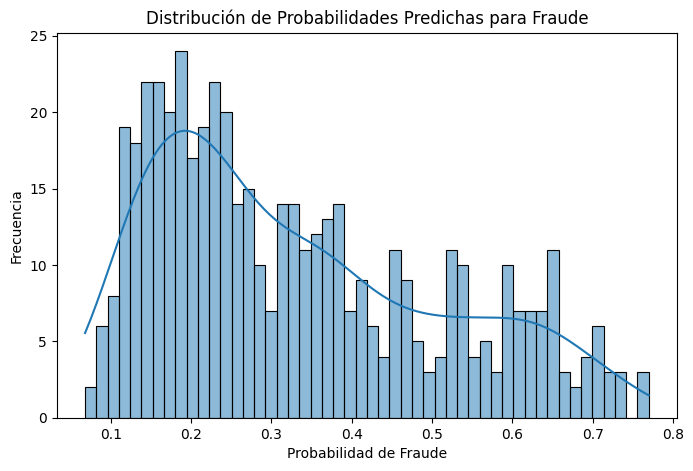

In [174]:
# Obtener las probabilidades predichas para la clase fraudulenta (1)
Y_pred_proba = xgb_best.predict_proba(X_test)[:, 1]  # Probabilidad de ser fraude

# Visualizar distribución de probabilidades
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(Y_pred_proba, bins=50, kde=True)
plt.title("Distribución de Probabilidades Predichas para Fraude")
plt.xlabel("Probabilidad de Fraude")
plt.ylabel("Frecuencia")
plt.show()


In [182]:
# Ajustar umbral manualmente
threshold = 0.3  # Prueba con 0.3, 0.2 o incluso 0.1
Y_pred_adjusted = (Y_pred_proba > threshold).astype(int)

# Evaluar con el nuevo umbral
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_adjusted))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_adjusted))


Confusion Matrix:
[[251 226]
 [ 12  11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.53      0.68       477
           1       0.05      0.48      0.08        23

    accuracy                           0.52       500
   macro avg       0.50      0.50      0.38       500
weighted avg       0.91      0.52      0.65       500

